# AB TEST

In [235]:
#import libraries
import pandas as pd 
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import pandahouse as ph
import pingouin as pg
from tqdm.auto import tqdm
from scipy.stats import norm

In [236]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-zubenko-22/FINAL PROJECT /Проект_2_groups .csv', sep = ';')

In [237]:
#a file with information about the user's belonging to the control or experimental group (A - control, B - target group)
df


,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


Examine the data: check the table for empty values ​​and find out the data types.

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


Check for duplicates

In [239]:
df.drop_duplicates()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A
...,...,...
74479,5692459,B
74480,5692572,B
74481,5692865,B
74482,5693667,B


In [240]:
df1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-zubenko-22/FINAL PROJECT /Проект_2_group_add.csv', sep = ',')
df1

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B
...,...,...
87,200247820,B
88,201032527,B
89,201067612,B
90,201067653,B


In [241]:
df3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-zubenko-22/FINAL PROJECT /Проект_2_active_studs.csv')
#a file with information about users who logged into the platform on the days of the experiment.
df3= df3.rename(columns={'student_id':'id'})
df3

,id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [242]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [243]:
df3.drop_duplicates()

#no duplicates


,id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369
...,...
8336,1794344
8337,296883
8338,3598448
8339,3610547


In [244]:
partisipants = df3.merge(df, how = 'inner', on = 'id')
partisipants

,id,grp
0,581585,A
1,3276743,B
2,4238589,A
3,4475369,B
4,5481015,B
...,...,...
8323,1794344,B
8324,296883,B
8325,3598448,B
8326,3610547,B


In [245]:
checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-zubenko-22/FINAL PROJECT /Проект_2_checks.csv',sep = ';')
checks = checks.rename(columns={'student_id':'id'})
checks

,id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0
...,...,...
536,5645737,1900.0
537,5651566,1900.0
538,5662322,1900.0
539,5681918,1900.0


Examining the data, we found that one of the users of the target group made a payment, but did not visit the site on the days of the experiment, we can make an assumption that the site has a subscription and this is a payment for it.


In [246]:
checks_add = df1.merge(checks, how = 'inner', on = 'id')
checks_add

,id,grp,rev
0,5740903,B,1900.0


In [247]:
df3.loc[df3['id']=='5740903']

#additional check that this user is not in the list of people who visited the site on the day of the experiment.

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,id


To work with data, we need to combine tables into one where the data we need will be presented.

In [248]:
#this is the main table for work, which includes users who participated in the experiment and with the amounts they paid
partisipants_paid = partisipants.merge(checks, how = 'left', on = 'id')
partisipants_paid['rev'] = partisipants_paid['rev'].fillna(0)

partisipants_paid



,id,grp,rev
0,581585,A,0.0
1,3276743,B,0.0
2,4238589,A,0.0
3,4475369,B,0.0
4,5481015,B,0.0
...,...,...,...
8323,1794344,B,0.0
8324,296883,B,0.0
8325,3598448,B,0.0
8326,3610547,B,290.0


We analyze the data:

In [249]:
partisipants_paid.describe()

,id,rev
count,8.328000e+03,8328.000000
mean,2.443348e+06,55.943084
std,1.560651e+06,309.195015
min,1.627000e+03,0.000000
25%,1.117583e+06,0.000000
50%,2.084543e+06,0.000000
75%,3.628664e+06,0.000000
max,5.690284e+06,4650.000000


In [250]:
partisipants_paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8328 entries, 0 to 8327
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8328 non-null   int64  
 1   grp     8328 non-null   object 
 2   rev     8328 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 260.2+ KB


Next, we need to aggregate the data to see the spread of payments in the two groups and visually see them on the graph.

In [251]:
#aggregate in order to see the spread of payments for users in group A
partisipants_paid_general_A = partisipants_paid.query("grp == 'A'")\
.groupby('rev', as_index = False)\
.agg({'id':'count'})
partisipants_paid_general_A 

,rev,id
0,0.0,1457
1,199.0,5
2,290.0,25
3,398.0,1
4,489.0,2
5,580.0,6
6,590.0,5
7,690.0,4
8,840.0,3
9,870.0,1


In [252]:
#aggregate in order to see the spread of payments for users in group B
partisipants_paid_general_B = partisipants_paid.query("grp == 'B'")\
.groupby('rev', as_index = False)\
.agg({'id':'count'})
partisipants_paid_general_B

,rev,id
0,0.0000,6480
1,199.0000,27
2,290.0000,45
3,398.0000,6
4,489.0000,1
5,580.0000,5
6,590.0000,6
7,597.0000,1
8,690.0000,13
9,796.0000,1


Below are graphs with payments of users of the two groups.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


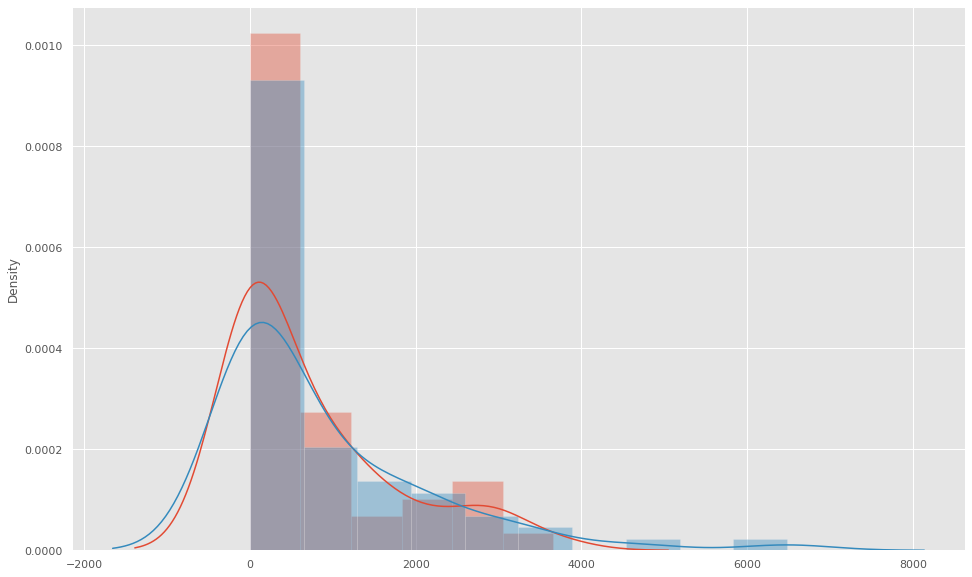

In [253]:
sns.distplot(partisipants_paid_general_A)
sns.distplot(partisipants_paid_general_B)

Let's optimize the graphics a bit and look only at active users who have paid.

In [254]:
#it is difficult to judge from the obtained graphs since the scatter is large, in order to reduce the scatter, we take only positive values of rev , that is, the payment facts themselves and the amount 
partisipants_paid_A = partisipants_paid[['grp', 'rev']]\
.query("grp == 'A' and rev > 0")
partisipants_paid_A

,grp,rev
61,A,1530.0
98,A,1980.0
304,A,580.0
390,A,2910.0
437,A,690.0
...,...,...
7937,A,3660.0
8012,A,2910.0
8014,A,290.0
8191,A,398.0


In [255]:
partisipants_paid_B = partisipants_paid[['grp', 'rev']]\
.query("grp == 'B' and rev > 0")
partisipants_paid_B

,grp,rev
66,B,1900.0001
76,B,1900.0000
191,B,1900.0000
193,B,1900.0000
209,B,1900.0000
...,...,...
8096,B,1900.0001
8178,B,1900.0000
8188,B,199.0000
8264,B,597.0000


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


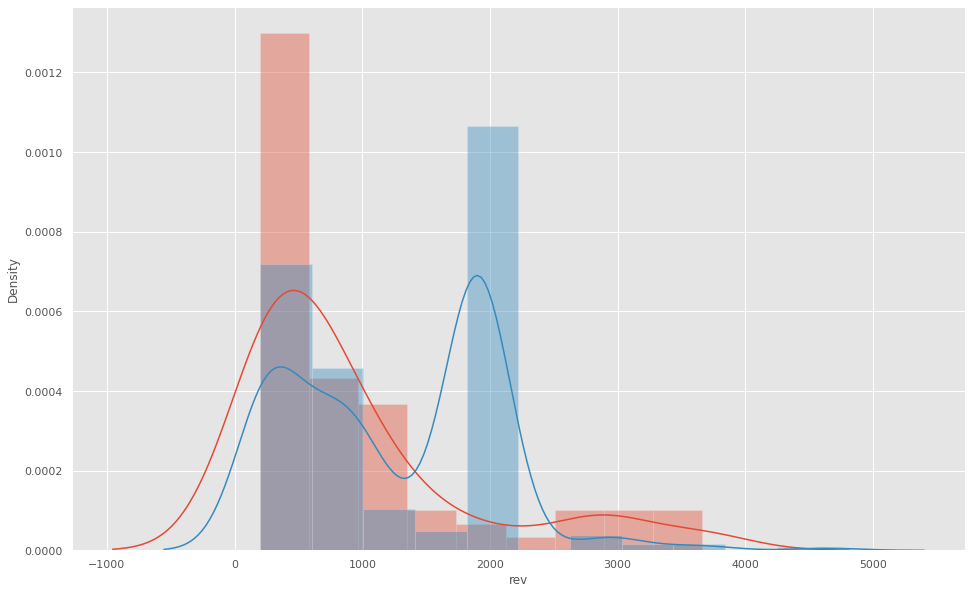

In [256]:
sns.distplot(partisipants_paid_A['rev'])
sns.distplot(partisipants_paid_B['rev'])

Primary conclusions:

1. There are outliers on the graphs.
2. The distribution is not normal
3. 127 users from group B paid 1900 rubles each, this outlier may indicate a promotion for certain products, or, as an assumption, it could be a payment for a subscription.

For further conclusions, the information content of the graph is not enough, so we calculate the main parameters.


To check the normality of the distribution, we use the Shapiro-Wilk method
H0 - normal distribution
H1 - distribution is abnormal

In [257]:
partisipants_paid['paid'] = partisipants_paid.rev > 0

partisipants_paid

,id,grp,rev,paid
0,581585,A,0.0,False
1,3276743,B,0.0,False
2,4238589,A,0.0,False
3,4475369,B,0.0,False
4,5481015,B,0.0,False
...,...,...,...,...
8323,1794344,B,0.0,False
8324,296883,B,0.0,False
8325,3598448,B,0.0,False
8326,3610547,B,290.0,True


Parameters calculation: ARPPU , ARPU, paid - number of paid users, CR

In [258]:


metric = partisipants_paid.groupby('grp', as_index=False).agg({'paid' : ['mean', 'sum'], 'rev' : ['mean', 'sum']}, ). \
rename(columns={'paid': 'CR', 'rev' : 'ARPAU'})


metric.columns = ['grp', 'CR','user_numbers','ARPAU', 'sum_rev']
metric['paid'] = partisipants_paid.query('rev>0').groupby('grp', as_index=False).agg({'id': 'count'}).id


metric['ARPPU'] = metric.sum_rev/metric.user_numbers


metric.drop(['user_numbers', 'sum_rev'], axis=1, inplace=True)


metric['CR'] = metric['CR'] * 100

In [259]:
 metric.round(2)

,grp,CR,ARPAU,paid,ARPPU
0,A,5.08,47.44,78,933.59
1,B,4.61,57.86,313,1255.83


Group B APRAU and ARPU are higher but lower conversion, for further work we need to understand if CR is statistically significant in this test.


We will use a chi-square to test for differences between CRs, since the fact of payment is presented on a nominal scale, and our groups are independent. Let's announce the hypotheses:
H0: CR of different groups is not statistically significantly different H1: There are statistically significant differences in CR of different groups
We take the significance level equal to 0.05

In [260]:
stats = pg.chi2_independence(partisipants_paid, x = 'grp', y = 'paid')
stats

(paid        False       True 
 grp                          
 A     1462.931676   72.068324
 B     6474.068324  318.931676,
 paid   False  True 
 grp                
 A     1457.5   77.5
 B     6479.5  313.5,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  0.526607  1.0  0.468037  0.007952  0.112168
 1        cressie-read  0.666667  0.523446  1.0  0.469375  0.007928  0.111786
 2      log-likelihood  0.000000  0.517247  1.0  0.472019  0.007881  0.111037
 3       freeman-tukey -0.500000  0.512702  1.0  0.473971  0.007846  0.110488
 4  mod-log-likelihood -1.000000  0.508246  1.0  0.475899  0.007812  0.109950
 5              neyman -2.000000  0.499590  1.0  0.479680  0.007745  0.108905)

We see that the chi-square is greater than zero, therefore we cannot reject the null hypothesis, which means that the CR of different groups is not statistically significantly different

Since the distribution of the data is not normal, we will use the Bootstrap method to test the hypotheses
H0 - average checks are equal (experiment unsuccessful)
H1 - there is a strong difference in average bills

In [261]:
group_a=partisipants_paid_A['rev']
group_b=partisipants_paid_B['rev']

In [262]:
def get_bootstrap(
    group_a, # numeric values of the first sample
    group_b, # numeric values of the second sample
    boot_it = 1000, # number of bootstrap subsamples
    statistic = np.mean, # the statistics we are interested in
    bootstrap_conf_level = 0.95 # significance level
):
    boot_len = max([len(group_a), len(group_b)])
    boot_data = []
    for i in tqdm(range(boot_it)): # extract subsamples
        samples_1 = group_a.sample(
            boot_len, 
            replace = True # return parameter
        ).values
        
        samples_2 = group_b.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() 
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Visualization
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

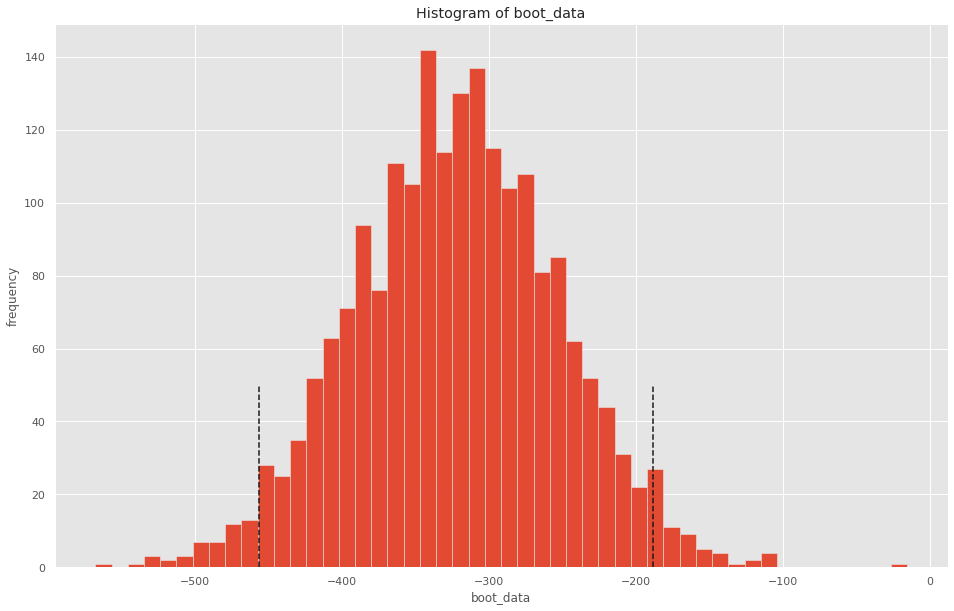

In [263]:
 booted_data = get_bootstrap(group_a, group_b, boot_it = 2000)

We see that when subtracting values ​​from group A, the values ​​of group B do not fall into the confidence interval, the difference in values ​​turned out to be negative, therefore the average check of group B is much larger, so we can reject the null hypothesis about the equality of checks.



We will also conduct a T-test, since our samples are:

1. independent 2. the number of degrees of freedom is more than 30

In [264]:
from scipy import stats

In [265]:
stats.ttest_ind(group_a,group_b)

Ttest_indResult(statistic=-3.1114389810411063, pvalue=0.001999178025210522)

pvalue=0.001999178025210522)  < 0.05, 
we reject the null hypothesis about the equality of average bills.


Since CR is not statistically significantly different, and an increase was confirmed for ARPAU, we can consider the experiment successful and accept the changes.

# SQL 

In [266]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [267]:
q = '''
     select  count(st_id) as Students
from  (select sum(correct) as quantity , st_id
from default.peas
where correct = '1'
group by st_id)
having quantity > 19
limit 1000

    '''

# send a request and write the result to a pandas dataframe
q_test = ph.read_clickhouse(query=q, connection=connection_default)
q_test

,Students
0,136


In [268]:
data = '''
SELECT 
    test_grp,
    round(SUM(checks.money) / uniqExact(studs.st_id),2) AS ARPU,
    round(sumIf(checks.money, activeness.successful_tasks > 10 ) / uniqIf(activeness.st_id, activeness.successful_tasks > 10),2) AS ARPAU,
    round(uniqIf(studs.st_id, checks.money > 0) / uniqExact(studs.st_id) ,2) AS CR,
    round(uniqIf(studs.st_id, checks.money > 0 AND activeness.successful_tasks > 10) / uniqIf(studs.st_id, activeness.successful_tasks > 10),2) AS active_CR,
    round(uniqIf(studs.st_id, activeness.math > 1 AND checks.money > 0) / uniqIf(studs.st_id, activeness.math > 1) ,2) AS math_CR
    FROM studs
LEFT JOIN 
    (
    SELECT
        st_id,
        SUM(correct) AS successful_tasks,
        sumIf(correct, subject = 'Math') AS math
    FROM peas
    GROUP BY st_id) as activeness
ON studs.st_id = activeness.st_id
LEFT JOIN final_project_check as checks
ON studs.st_id = checks.st_id
GROUP BY test_grp
        '''

In [269]:
data = ph.read_clickhouse(query=data, connection=connection_default)
data 

,test_grp,ARPU,ARPAU,CR,active_CR,math_CR
0,control,4540.98,10393.70,0.05,0.11,0.10
1,pilot,11508.47,29739.58,0.11,0.26,0.14


# Functions

Implement a function that can load data and read metrics

In [270]:

file_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-zubenko-22/FINAL PROJECT /Проект_2_group_add.csv'

def import_data(file_path):
    groups_full = df.append(pd.read_csv(file_path, sep = ','))
    df_update = partisipants.merge(checks, how='left', on='id')
    df_update.rev = df_update.rev.fillna(0)
    exp_update = groups_full.query('id in @df_update.id')
    full_update = exp_update.merge(df_update, how='left', on='id')
    ab_update = full_update.groupby('grp_x', as_index=False).agg({'id': 'count'}).round(2)
    ab_update['paid'] = full_update.query('rev>0').groupby('grp_x', as_index=False).agg({'id': 'count'}).id
    ab_update['cr'] = (full_update.query('rev >0').groupby('grp_x', as_index=False).agg({'id': 'count'}).id / ab_update.id * 100).round(2)
    ab_update['ARPAU'] = (full_update.groupby('grp_x', as_index=False).agg({'rev': 'sum'}).rev / ab_update.paid).round(0)
    ab_update['ARPU'] = full_update.groupby('grp_x', as_index=False).agg({'rev': 'mean'}).rev.round(0)
    return ab_update 

In [271]:
import_data(file_path) 

,grp_x,id,paid,cr,ARPAU,ARPU
0,A,1535,78,5.08,934.0,47.0
1,B,6793,313,4.61,1256.0,58.0


Функция которая рисует графики. 

In [272]:

def graphs(new_metrics): 
    sns.set(rc={'figure.figsize':(16,10)})
    fig, axes = plt.subplots(nrows=1, ncols=3)
    
    sns.barplot(x=new_metrics.grp, y=new_metrics.CR, ax=axes[0], palette='colorblind').set_title('CR')
    sns.barplot(x=new_metrics.grp, y=new_metrics.ARPAU, ax=axes[1], palette='colorblind').set_title('ARPAU')
    sns.barplot(x=new_metrics.grp, y=new_metrics.ARPPU, ax=axes[2], palette='colorblind').set_title('ARPPU')  
    

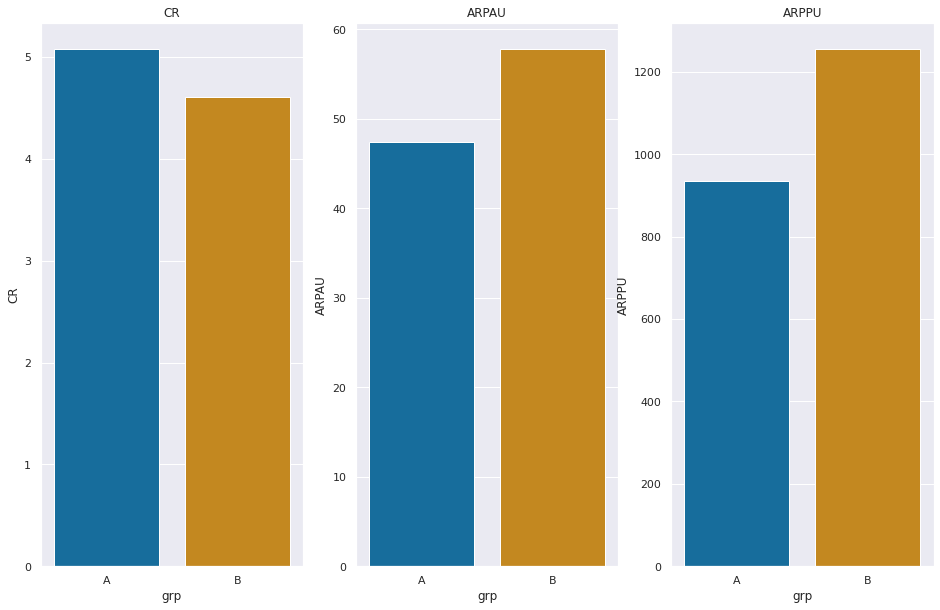

In [273]:
 graphs(metric)